# Random Forest dataset analysis

## Import section

In [1]:
from selfdist_toolkit.randomforest_tools.evaluation import evaluate_assays_rf
from selfdist_toolkit.data_tools.loading import load_pure_data
from selfdist_toolkit.data_tools.analysis import dataframe_add_statistical_exp_data

## Data Fetching section

In [2]:
df_chem = evaluate_assays_rf(
    perc_sd=0.2,
    mode="chem-desc"
)

In [3]:
df_fing = evaluate_assays_rf(
    perc_sd=0.2,
    mode="fingerprint"
)

## Add Experiment-Related Statistical Information

In [4]:
df_chem_ext = dataframe_add_statistical_exp_data(df_chem)

In [5]:
df_fing_ext = dataframe_add_statistical_exp_data(df_fing)

## Analysing and Plotting

In [6]:
import matplotlib.pyplot as plt

In [7]:
df_chem_ext.head()

,aid,teacher_accuracy,teacher_balanced_accuracy,teacher_roc,teacher_precision,teacher_recall,student_accuracy,student_balanced_accuracy,student_roc,student_precision,student_recall,mol_total,mol_active,mol_inactive
0,411.0,0.977155,0.545309,0.545309,0.970722,0.977155,0.977228,0.540872,0.540872,0.971568,0.977228,68285,1536,66749
1,519.0,0.925926,0.500000,0.500000,0.857339,0.925926,0.925926,0.500000,0.500000,0.857339,0.925926,266,23,243
2,523.0,0.833333,0.833333,0.833333,0.875000,0.833333,0.833333,0.833333,0.833333,0.875000,0.833333,26,10,16
3,679.0,0.736842,0.500000,0.500000,0.542936,0.736842,0.736842,0.500000,0.500000,0.542936,0.736842,91,21,70
4,711.0,0.750000,0.500000,0.500000,0.562500,0.750000,0.750000,0.500000,0.500000,0.562500,0.750000,40,11,29


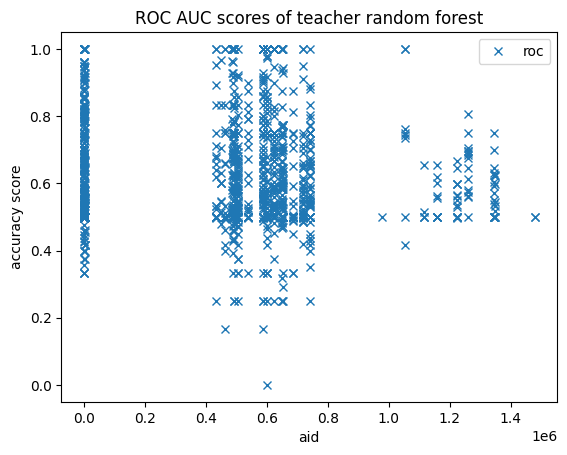

In [8]:
plt.plot(df_chem_ext.aid.to_numpy().astype(int), df_chem_ext.teacher_roc.to_numpy(), label="roc", marker="x", linestyle="")
plt.title("ROC AUC scores of teacher random forest")
plt.xlabel("aid")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

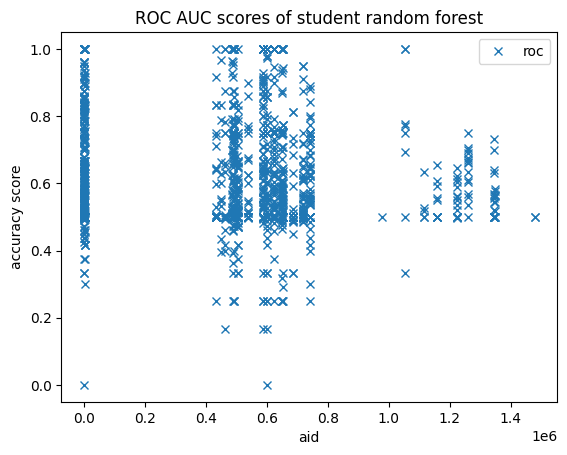

In [9]:
plt.plot(df_chem_ext.aid.to_numpy().astype(int), df_chem_ext.student_roc.to_numpy(), label="roc", marker="x", linestyle="")
plt.title("ROC AUC scores of student random forest")
plt.xlabel("aid")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

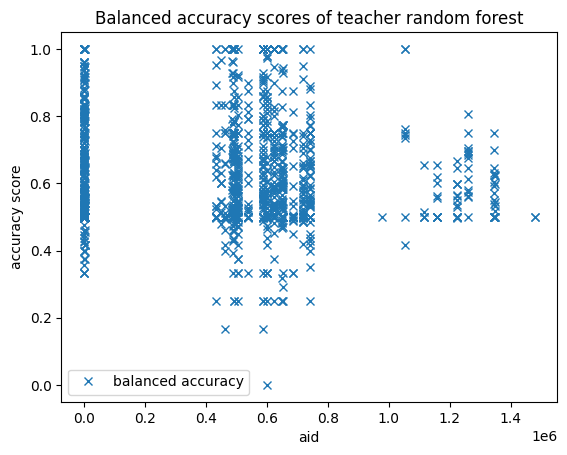

In [10]:
plt.plot(df_chem_ext.aid.to_numpy().astype(int), df_chem_ext.teacher_balanced_accuracy.to_numpy(), label="balanced accuracy", marker="x", linestyle="")
plt.title("Balanced accuracy scores of teacher random forest")
plt.xlabel("aid")
plt.ylabel("accuracy score")
plt.legend()
plt.show()

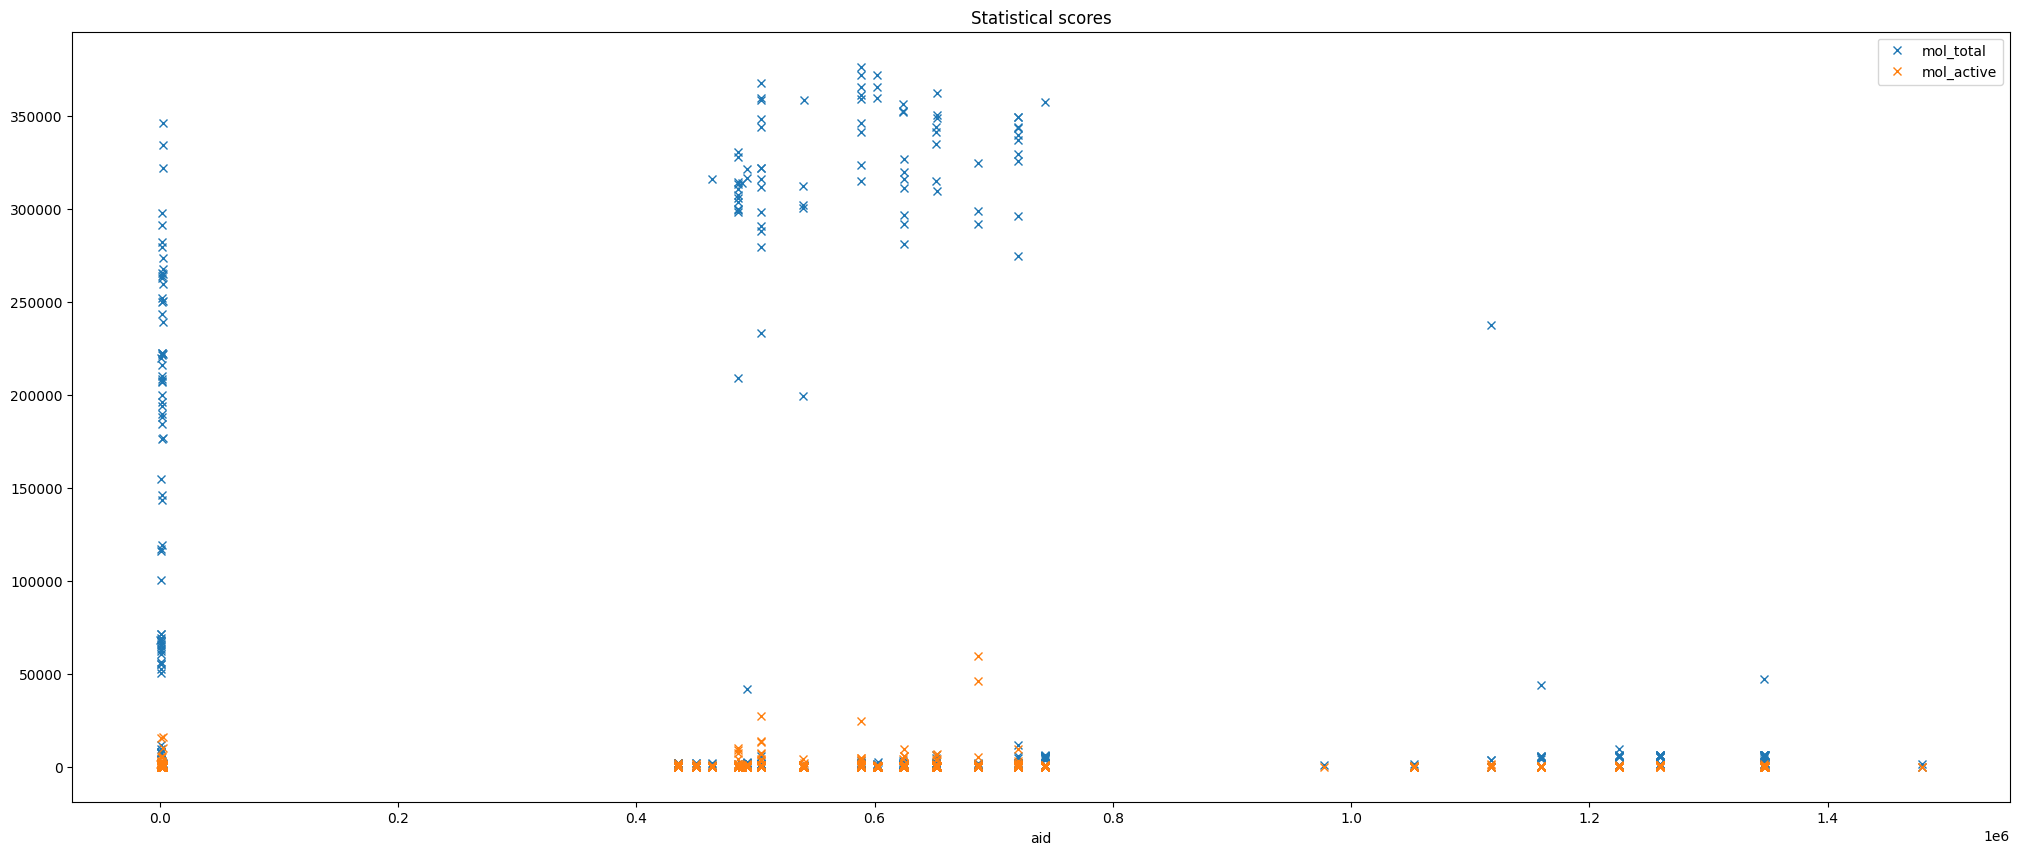

In [11]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(10)
plt.plot(df_chem_ext.aid.to_numpy().astype(int), df_chem_ext.mol_total.to_numpy(), label="mol_total", marker="x", linestyle="")
plt.plot(df_chem_ext.aid.to_numpy().astype(int), df_chem_ext.mol_active.to_numpy(), label="mol_active", marker="x", linestyle="")
plt.title("Statistical scores")
plt.xlabel("aid")
plt.legend()
plt.show()

## Data Analysis

Goal is to get a set of experiments which are relatively stable and are machine learnable

In [12]:
df_learnable1 = df_chem_ext[df_chem_ext.teacher_roc>=0.7]

In [13]:
df_learnable1.head()

,aid,teacher_accuracy,teacher_balanced_accuracy,teacher_roc,teacher_precision,teacher_recall,student_accuracy,student_balanced_accuracy,student_roc,student_precision,student_recall,mol_total,mol_active,mol_inactive
2,523.0,0.833333,0.833333,0.833333,0.875000,0.833333,0.833333,0.833333,0.833333,0.875000,0.833333,26,10,16
5,712.0,0.807692,0.736134,0.736134,0.809227,0.807692,0.769231,0.677311,0.677311,0.770821,0.769231,257,85,172
7,714.0,0.888889,0.750000,0.750000,0.902778,0.888889,0.888889,0.750000,0.750000,0.902778,0.888889,42,12,30
11,724.0,0.750000,0.700000,0.700000,0.825000,0.750000,0.583333,0.500000,0.500000,0.340278,0.583333,58,15,43
12,728.0,0.882353,0.923077,0.923077,0.921569,0.882353,0.882353,0.923077,0.923077,0.921569,0.882353,82,48,34


In [14]:
len(df_learnable1)

347

In [15]:
df_learnable2 = df_learnable1[df_learnable1.mol_total>=1000]

In [16]:
df_learnable2.head()

,aid,teacher_accuracy,teacher_balanced_accuracy,teacher_roc,teacher_precision,teacher_recall,student_accuracy,student_balanced_accuracy,student_roc,student_precision,student_recall,mol_total,mol_active,mol_inactive
34,884.0,0.879625,0.854638,0.854638,0.878558,0.879625,0.877019,0.851922,0.851922,0.875869,0.877019,9593,3274,6319
39,891.0,0.892091,0.763126,0.763126,0.886269,0.892091,0.894102,0.760202,0.760202,0.889214,0.894102,7457,1483,5974
45,899.0,0.863286,0.737359,0.737359,0.859036,0.863286,0.860077,0.727272,0.727272,0.856404,0.860077,7786,1782,6004
54,914.0,0.980926,0.721237,0.721237,0.978284,0.980926,0.981608,0.721586,0.721586,0.979091,0.981608,7340,216,7124
74,945.0,0.995434,0.750000,0.750000,0.995455,0.995434,0.995434,0.750000,0.750000,0.995455,0.995434,1094,21,1073


In [17]:
len(df_learnable2)

35

In [18]:
df_learnable3 = df_learnable2[(df_learnable2.mol_active>=100) & (df_learnable2.mol_inactive>=100)]

In [19]:
df_learnable3.head()

,aid,teacher_accuracy,teacher_balanced_accuracy,teacher_roc,teacher_precision,teacher_recall,student_accuracy,student_balanced_accuracy,student_roc,student_precision,student_recall,mol_total,mol_active,mol_inactive
34,884.0,0.879625,0.854638,0.854638,0.878558,0.879625,0.877019,0.851922,0.851922,0.875869,0.877019,9593,3274,6319
39,891.0,0.892091,0.763126,0.763126,0.886269,0.892091,0.894102,0.760202,0.760202,0.889214,0.894102,7457,1483,5974
45,899.0,0.863286,0.737359,0.737359,0.859036,0.863286,0.860077,0.727272,0.727272,0.856404,0.860077,7786,1782,6004
54,914.0,0.980926,0.721237,0.721237,0.978284,0.980926,0.981608,0.721586,0.721586,0.979091,0.981608,7340,216,7124
131,1418.0,0.774775,0.772690,0.772690,0.775481,0.774775,0.756757,0.751383,0.751383,0.767097,0.756757,1109,489,620


In [20]:
len(df_learnable3)

27

In [21]:
# plot the new good data

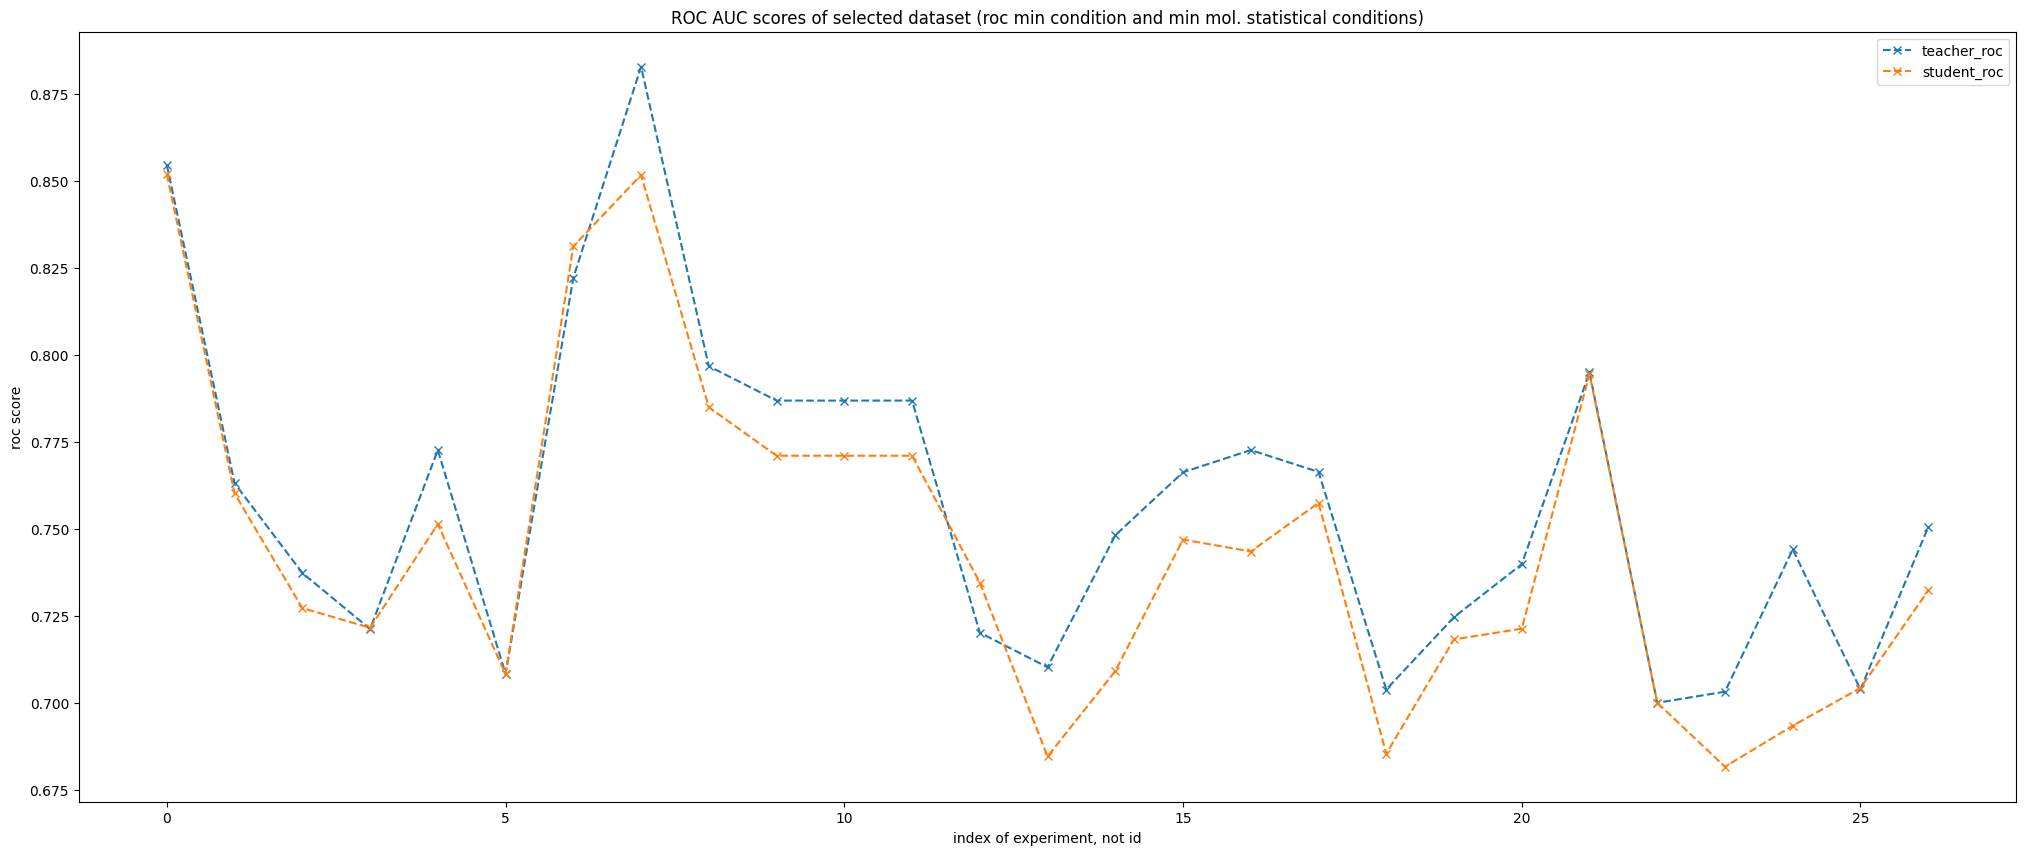

In [22]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(25)
plt.plot(df_learnable3.teacher_roc.to_numpy(), label="teacher_roc", linestyle="dashed", marker="x")
plt.plot(df_learnable3.student_roc.to_numpy(), label="student_roc", linestyle="dashed", marker="x")
plt.title("ROC AUC scores of selected dataset (roc min condition and min mol. statistical conditions)")
plt.xlabel("index of experiment, not id")
plt.ylabel("roc score")
plt.legend()
plt.show()

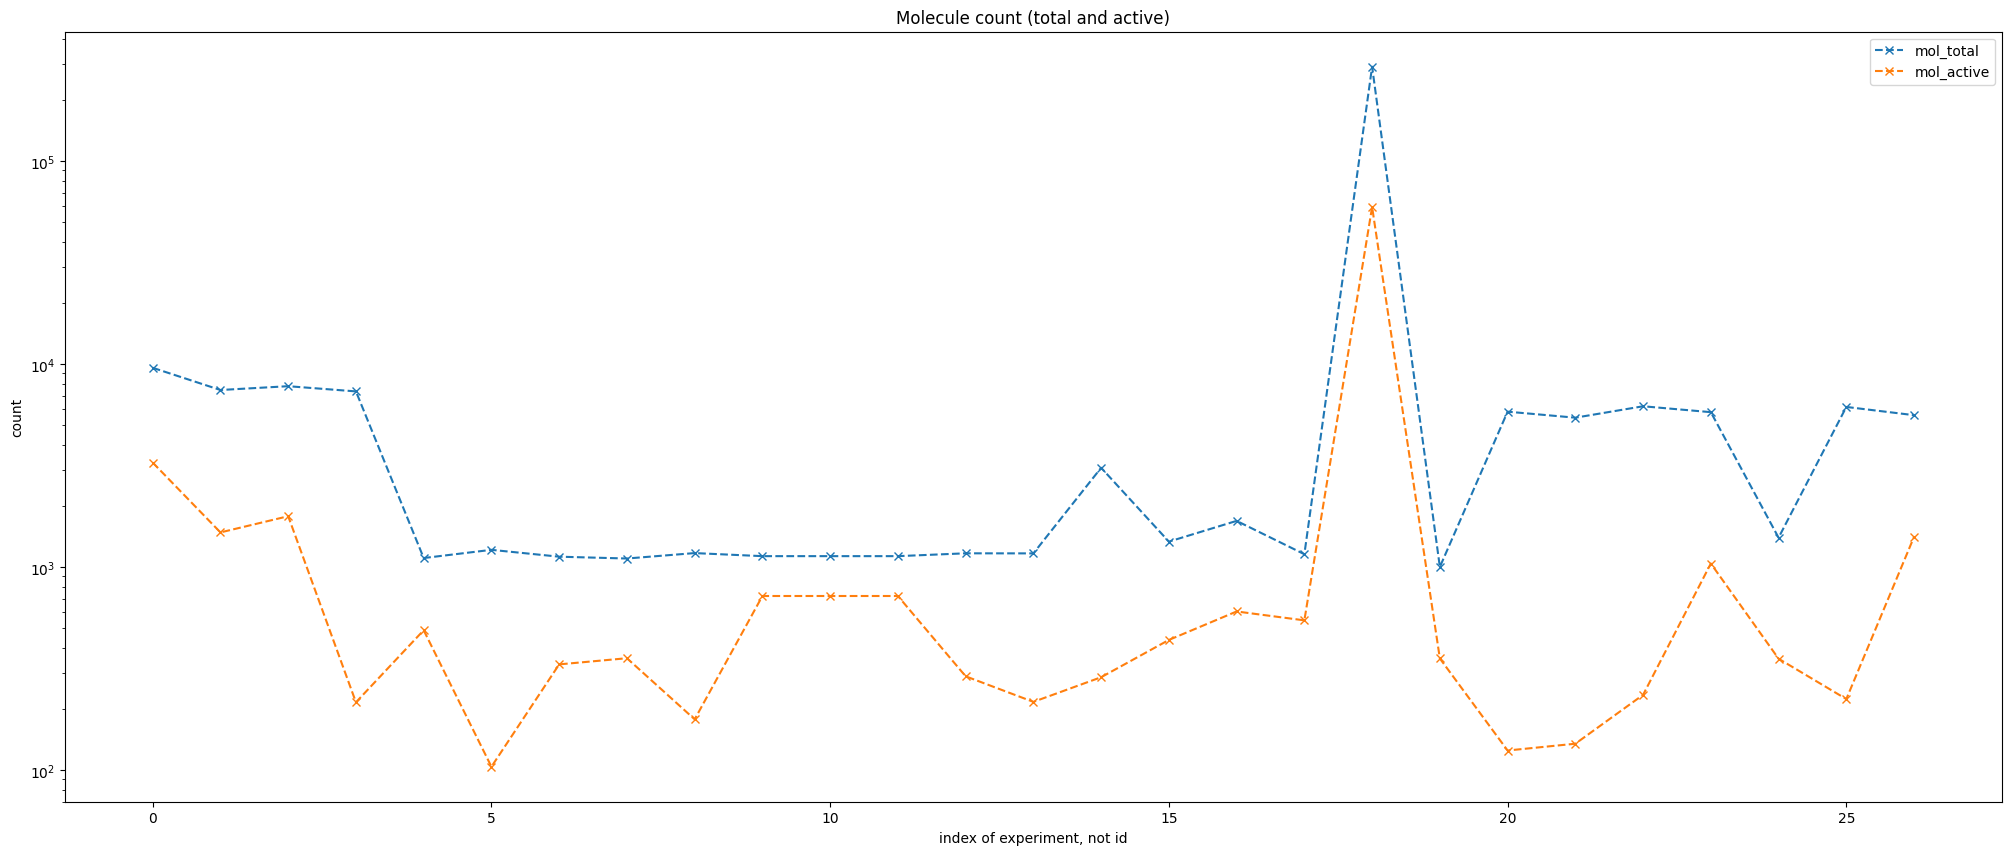

In [23]:
f = plt.figure()
f.set_figheight(10)
f.set_figwidth(25)
plt.plot(df_learnable3.mol_total.to_numpy(), label="mol_total", linestyle="dashed", marker="x")
plt.plot(df_learnable3.mol_active.to_numpy(), label="mol_active", linestyle="dashed", marker="x")
plt.yscale(value="log")
plt.title("Molecule count (total and active)")
plt.xlabel("index of experiment, not id")
plt.ylabel("count")
plt.legend()
plt.show()

## Saving good aids for gnn usage

In [24]:
saving_path = "results/random_forest/experiments_check/chem-desc_good-aid_1.csv"

In [25]:
df_learnable3.to_csv(saving_path, index_label=False)